In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
marvel_movies = pd.read_csv('mcu_box_office.csv')

# Let's do some data checks

In [6]:
#How many rows and columns does the data have?
marvel_movies.shape

(27, 10)

In [7]:
#What are the column names?
marvel_movies.columns

Index(['movie_title', 'mcu_phase', 'release_date', 'tomato_meter',
       'audience_score', 'movie_duration', 'production_budget',
       'opening_weekend', 'domestic_box_office', 'worldwide_box_office'],
      dtype='object')

In [8]:
#Let's get a preliminary view of the data
marvel_movies.head()

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"


In [16]:
#Describe the values from the data
marvel_movies.describe().round()

,mcu_phase,tomato_meter,audience_score,movie_duration
count,27.0,27.0,27.0,27.0
mean,2.0,84.0,84.0,132.0
std,1.0,11.0,11.0,16.0
min,1.0,47.0,45.0,111.0
25%,2.0,79.0,78.0,122.0
50%,3.0,87.0,87.0,130.0
75%,3.0,92.0,91.0,138.0
max,4.0,96.0,98.0,181.0


In [18]:
#Check if there any any missing values in the data
marvel_movies.isna().any()

movie_title             False
mcu_phase               False
release_date            False
tomato_meter            False
audience_score          False
movie_duration          False
production_budget       False
opening_weekend         False
domestic_box_office     False
worldwide_box_office    False
dtype: bool

In [20]:
#What are each column's data types?
marvel_movies.dtypes

movie_title             object
mcu_phase                int64
release_date            object
tomato_meter             int64
audience_score           int64
movie_duration           int64
production_budget       object
opening_weekend         object
domestic_box_office     object
worldwide_box_office    object
dtype: object

In [28]:
# Does the data contain any duplicate rows

marvel_movies.duplicated().any()

False

# Data Vizualization

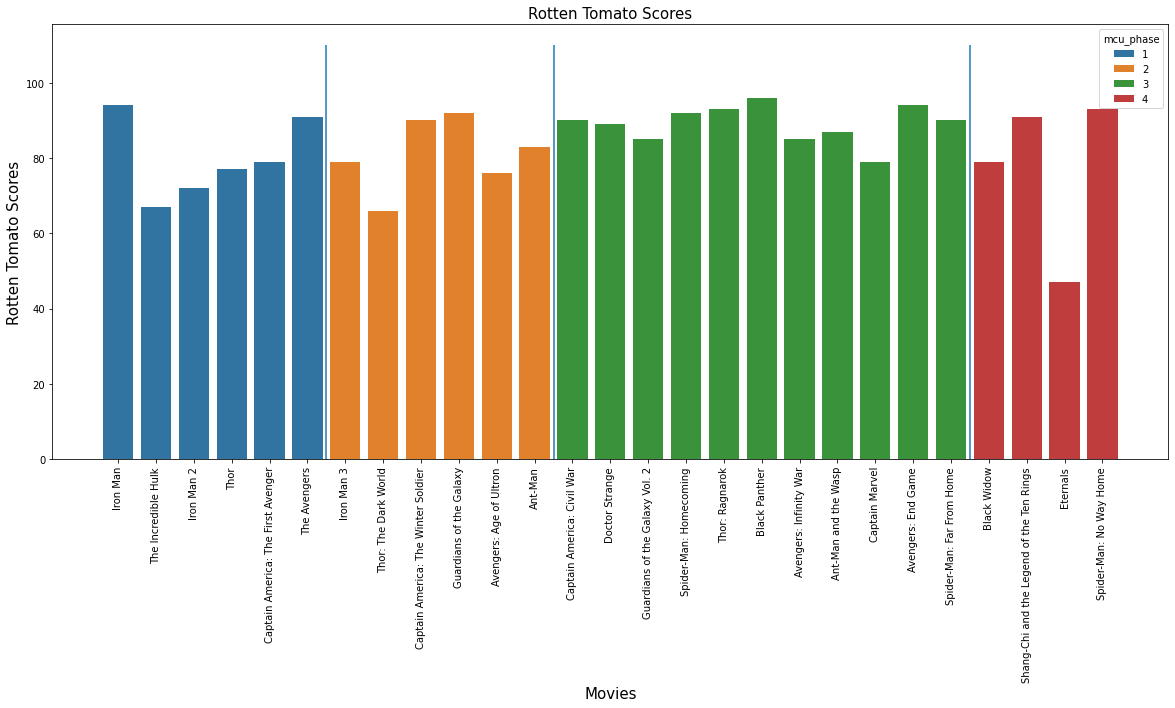

In [33]:
#Rotten Tomato scores for each marvel movie

plt.figure(figsize = (20,8))
plt.xticks(rotation = 90)
sns.barplot(x = 'movie_title', y = 'tomato_meter', data = marvel_movies, hue = 'mcu_phase', dodge = False)
plt.title('Rotten Tomato Scores', fontsize = 15)
plt.xlabel('Movies', fontsize = 15)
plt.ylabel('Rotten Tomato Scores', fontsize = 15)
plt.vlines(x = (5.5, 11.5, 22.5), ymin = 0, ymax = 110)

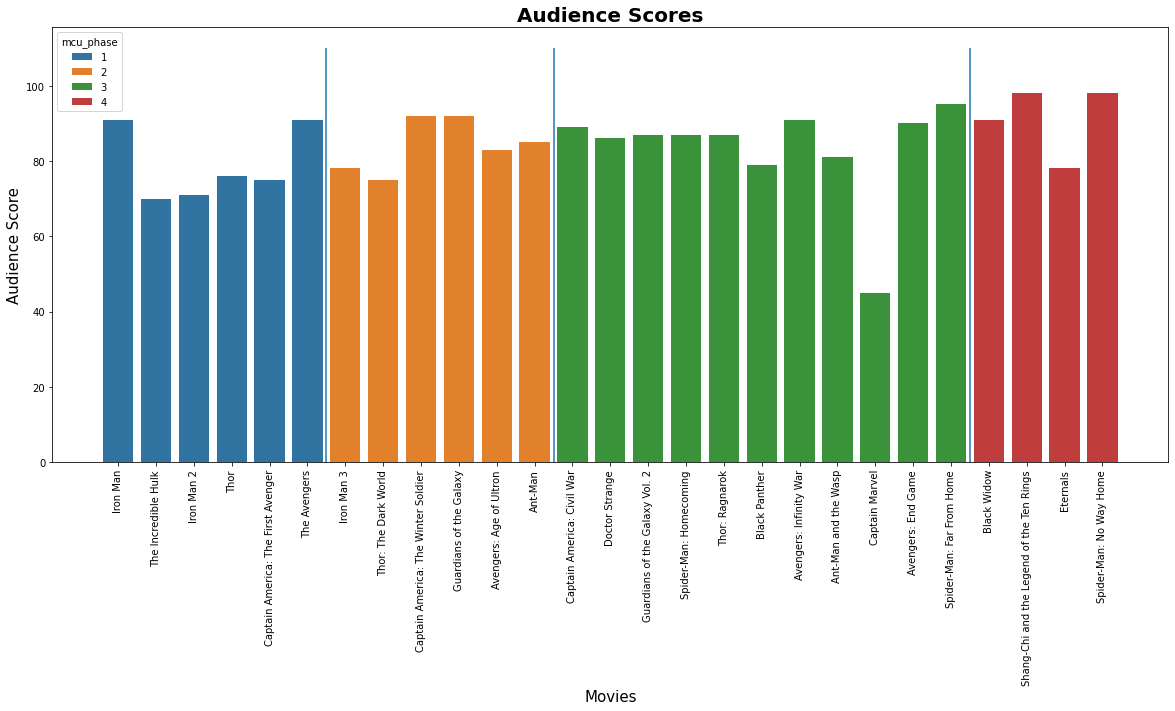

In [35]:
#Audience scores for each movie

plt.figure(figsize = (20,8))
plt.xticks(rotation = 90)
sns.barplot(x = 'movie_title', y = 'audience_score', data = marvel_movies, hue = 'mcu_phase', dodge = False)
plt.title('Audience Scores', fontsize = 20, fontweight = 'bold')
plt.xlabel('Movies', fontsize = 15)
plt.ylabel('Audience Score', fontsize = 15)
plt.vlines(x=(5.5, 11.5, 22.5), ymin = 0, ymax = 110)

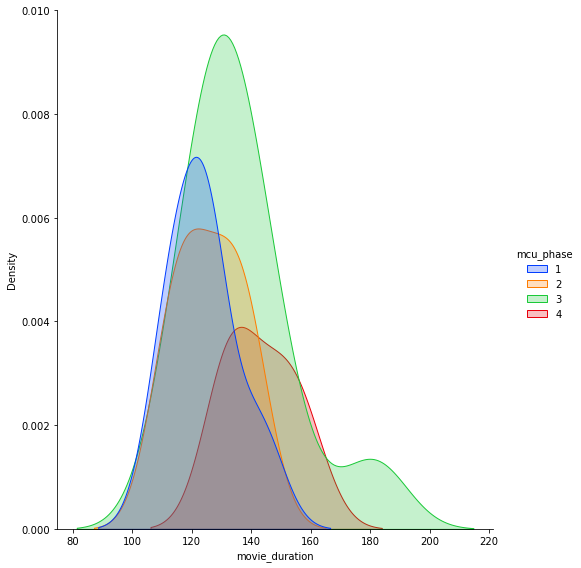

In [36]:
sns.displot(data=marvel_movies, x='movie_duration', hue='mcu_phase', kind='kde',
            fill=True, palette=sns.color_palette('bright')[:4], height=8, aspect=0.9)

<AxesSubplot:xlabel='movie_title', ylabel='movie_duration'>

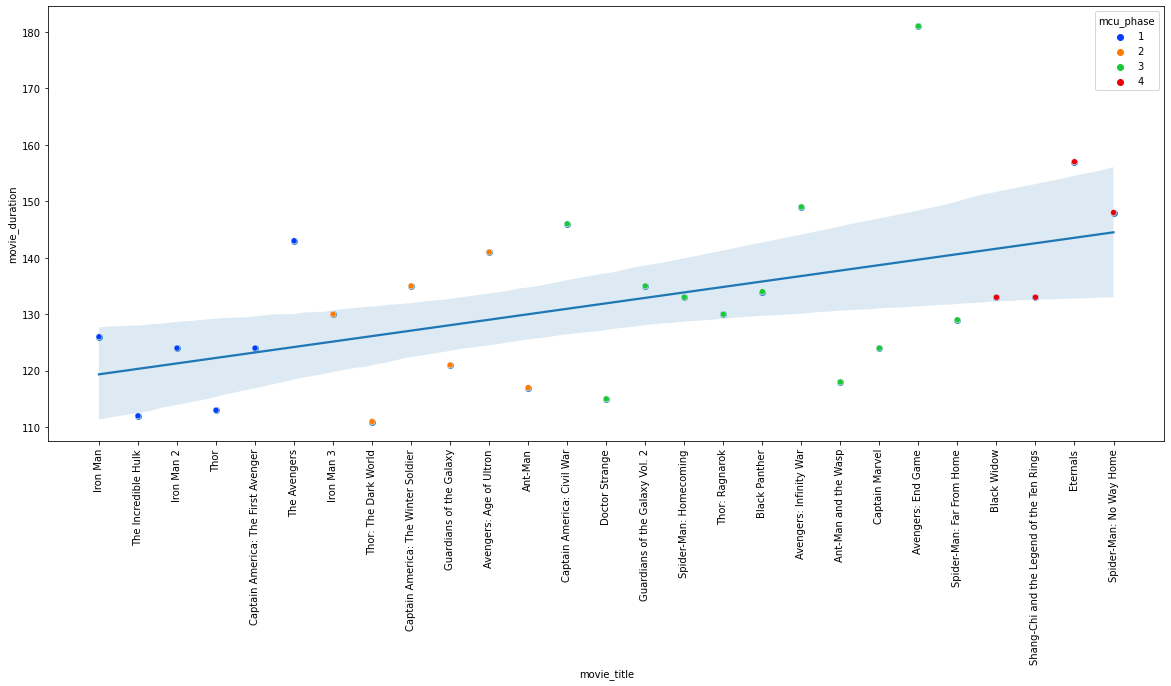

In [40]:
#Have the movies gotten longer

plt.figure(figsize = (20,8))
plt.xticks(rotation = 90)
sns.regplot(x = marvel_movies.index, y = 'movie_duration', data = marvel_movies)
sns.scatterplot(data = marvel_movies, x = 'movie_title', y = 'movie_duration', 
                hue = 'mcu_phase', palette=sns.color_palette('bright')[:4])

<AxesSubplot:xlabel='audience_score', ylabel='worldwide_box_office'>

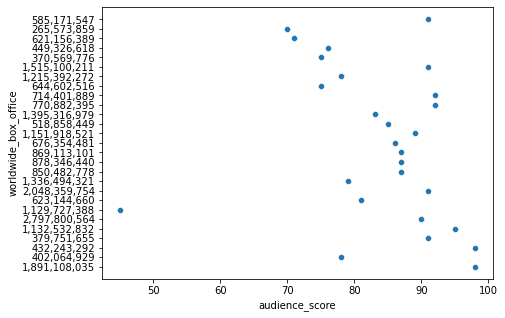

In [63]:
#Does a higher audience score mean high box office revenue?

plt.figure(figsize=(7,5))
sns.scatterplot(x="audience_score", y="worldwide_box_office", data=marvel_movies)
